# Working with custom data sets in pytorch


## Domain libraries
 Depending on the area or problem you are working on you look in the pytorch domain specific libraries to know how to load data

In [1]:
import torch
from torch import nn


device='cuda' if torch.cuda.is_available() else 'cpu'



## Get data

In [6]:
import requests
import zipfile # data is in a zip file in a github repo
from  pathlib import Path

data_path=Path("data/")
image_path=data_path/"pizza_steak_sushi"


#if the image folder doesn't exist , download and unzip
if image_path.is_dir():
    print(f'{image_path} directory already exists....skipping donwload')

else:
    print(f"{image_path} does not exist.... creating one now.....")
    image_path.mkdir(parents=True,exist_ok=True)

# download

with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")

    f.write(request.content)
# unzip zipfile
# 
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("Unzipping pizza,steak and sushi data...")
    zip_ref.extractall(image_path)    
        


data\pizza_steak_sushi directory already exists....skipping donwload
Unzipping pizza,steak and sushi data...


# Data preparation and exploration

In [7]:
import os
def walk_through(dir_path):
    """Walk through dir_path returning its contents"""
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"there are {len(dirnames)}directories and {len(filenames)} images in {dirpath}")

In [8]:
walk_through(image_path)

there are 2directories and 0 images in data\pizza_steak_sushi
there are 3directories and 0 images in data\pizza_steak_sushi\test
there are 0directories and 25 images in data\pizza_steak_sushi\test\pizza
there are 0directories and 19 images in data\pizza_steak_sushi\test\steak
there are 0directories and 31 images in data\pizza_steak_sushi\test\sushi
there are 3directories and 0 images in data\pizza_steak_sushi\train
there are 0directories and 78 images in data\pizza_steak_sushi\train\pizza
there are 0directories and 75 images in data\pizza_steak_sushi\train\steak
there are 0directories and 72 images in data\pizza_steak_sushi\train\sushi


In [9]:
# train and testing dat paths
test_dir=image_path/"test"
train_dir=image_path/"train"
test_dir,train_dir

(WindowsPath('data/pizza_steak_sushi/test'),
 WindowsPath('data/pizza_steak_sushi/train'))

### Visualizing an image
1. Get all the image pathss
2. Pick a random image path using Pythons's random.choice()
3. Get the image class name using pathlib.Path.parent.stem
4. Open images with Python's PIL
5. We'll then show the image and print metadata

data\pizza_steak_sushi\test\sushi\2394442.jpg
sushi
Random image path:data\pizza_steak_sushi\test\sushi\2394442.jpg
Image_class:sushi
Image height:408
image width:512


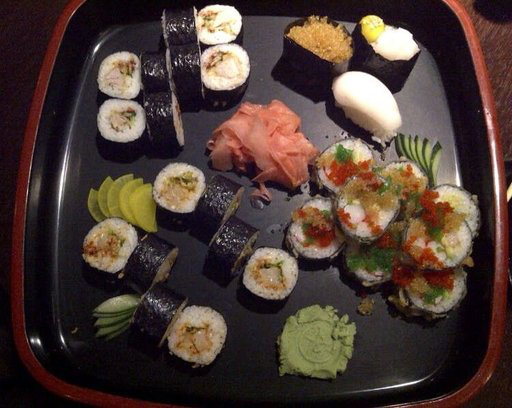

In [43]:
import random
from PIL import Image

#set random seed
random.seed(42)
# 1. get all the image paths
image_path_list=list(image_path.glob("*/*/*.jpg")) #gets all the images,puts it into a list so we can apply random.choice on it 

# 2 . pick a random image path

random_image_path=random.choice(image_path_list)

print(random_image_path)


# get image class name(name of the directory)
image_class=random_image_path.parent.stem
print(image_class)

# open image with pil
img=Image.open(random_image_path)

# print metadata
print(f"Random image path:{random_image_path}")
print(f"Image_class:{image_class}")
print(f"Image height:{img.height}")
print(f"image width:{img.width}")
img

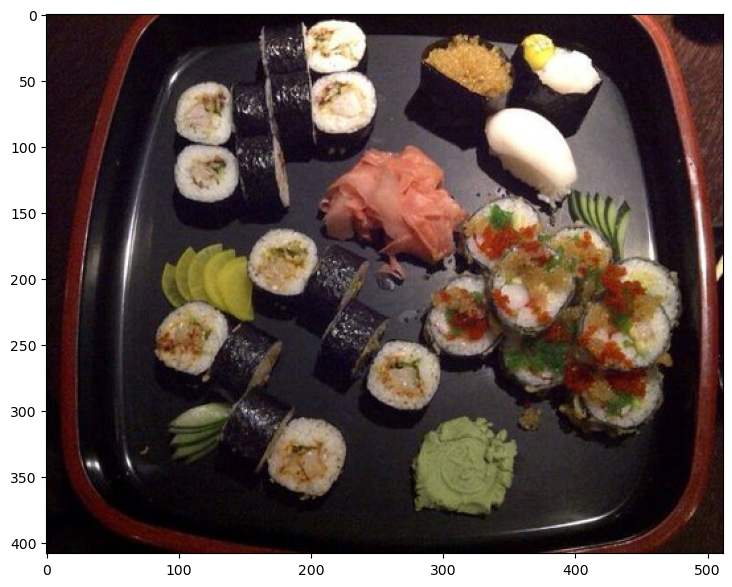

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# turn image into array
img_array=np.asarray(img)

#plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_array)